<a href="https://colab.research.google.com/github/CorleoneAppolonia/PMP-2024/blob/main/Lab4/Tema_lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercitiul 1


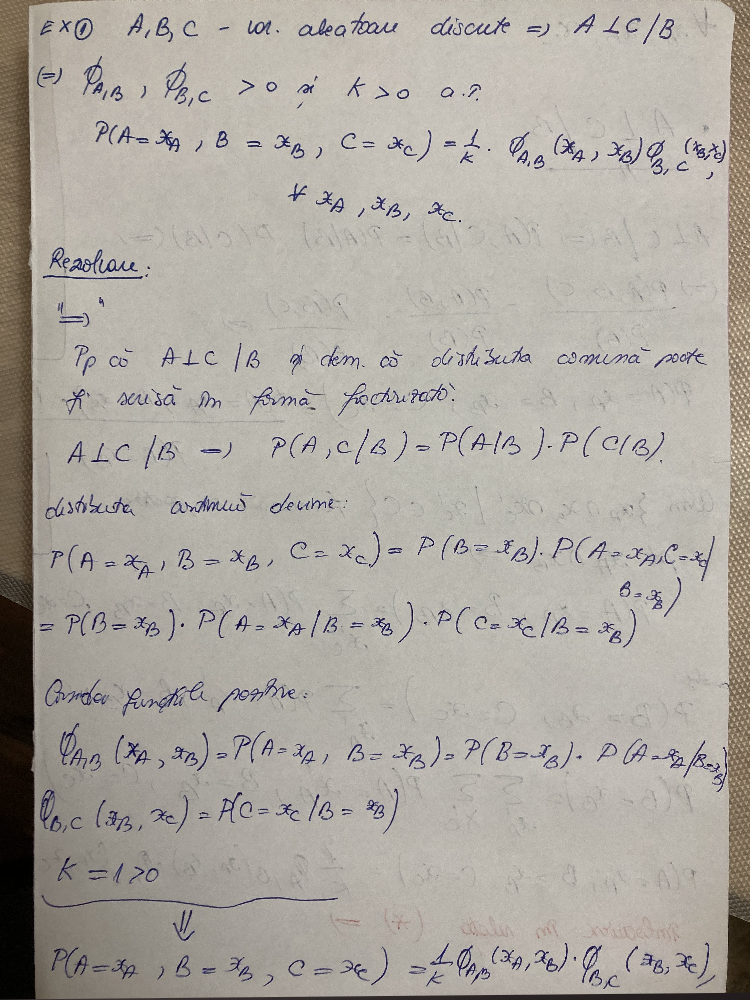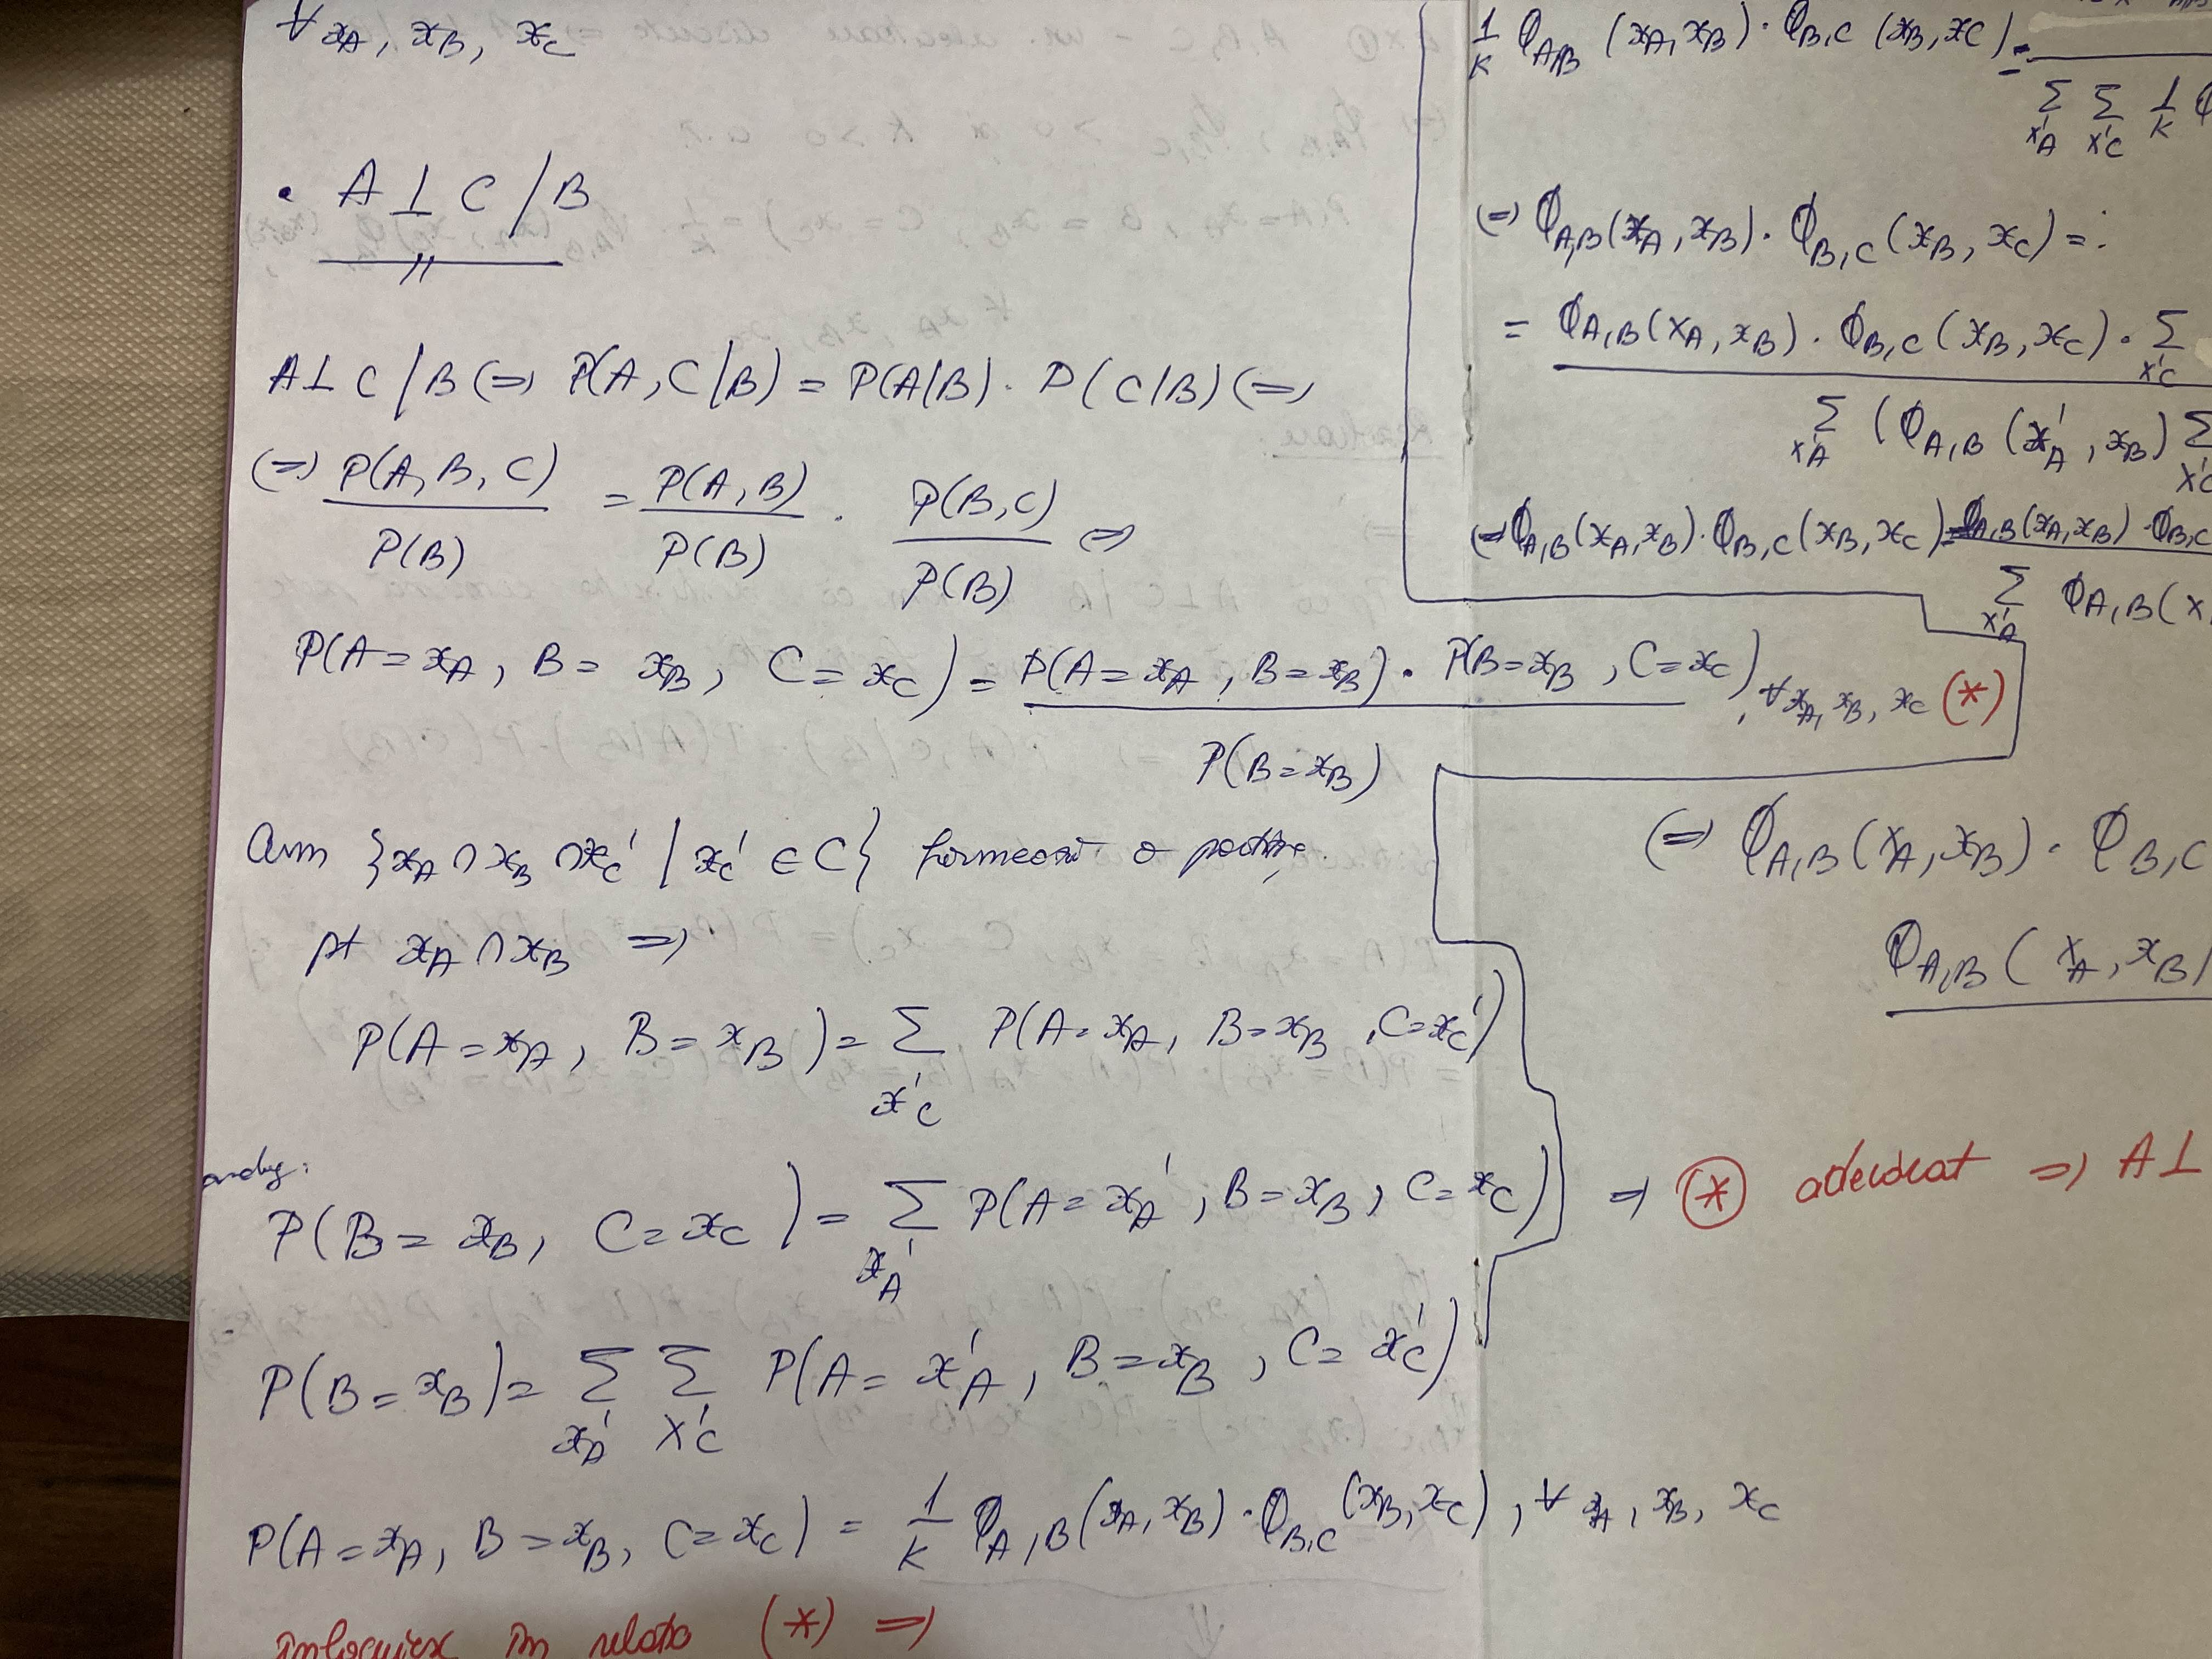

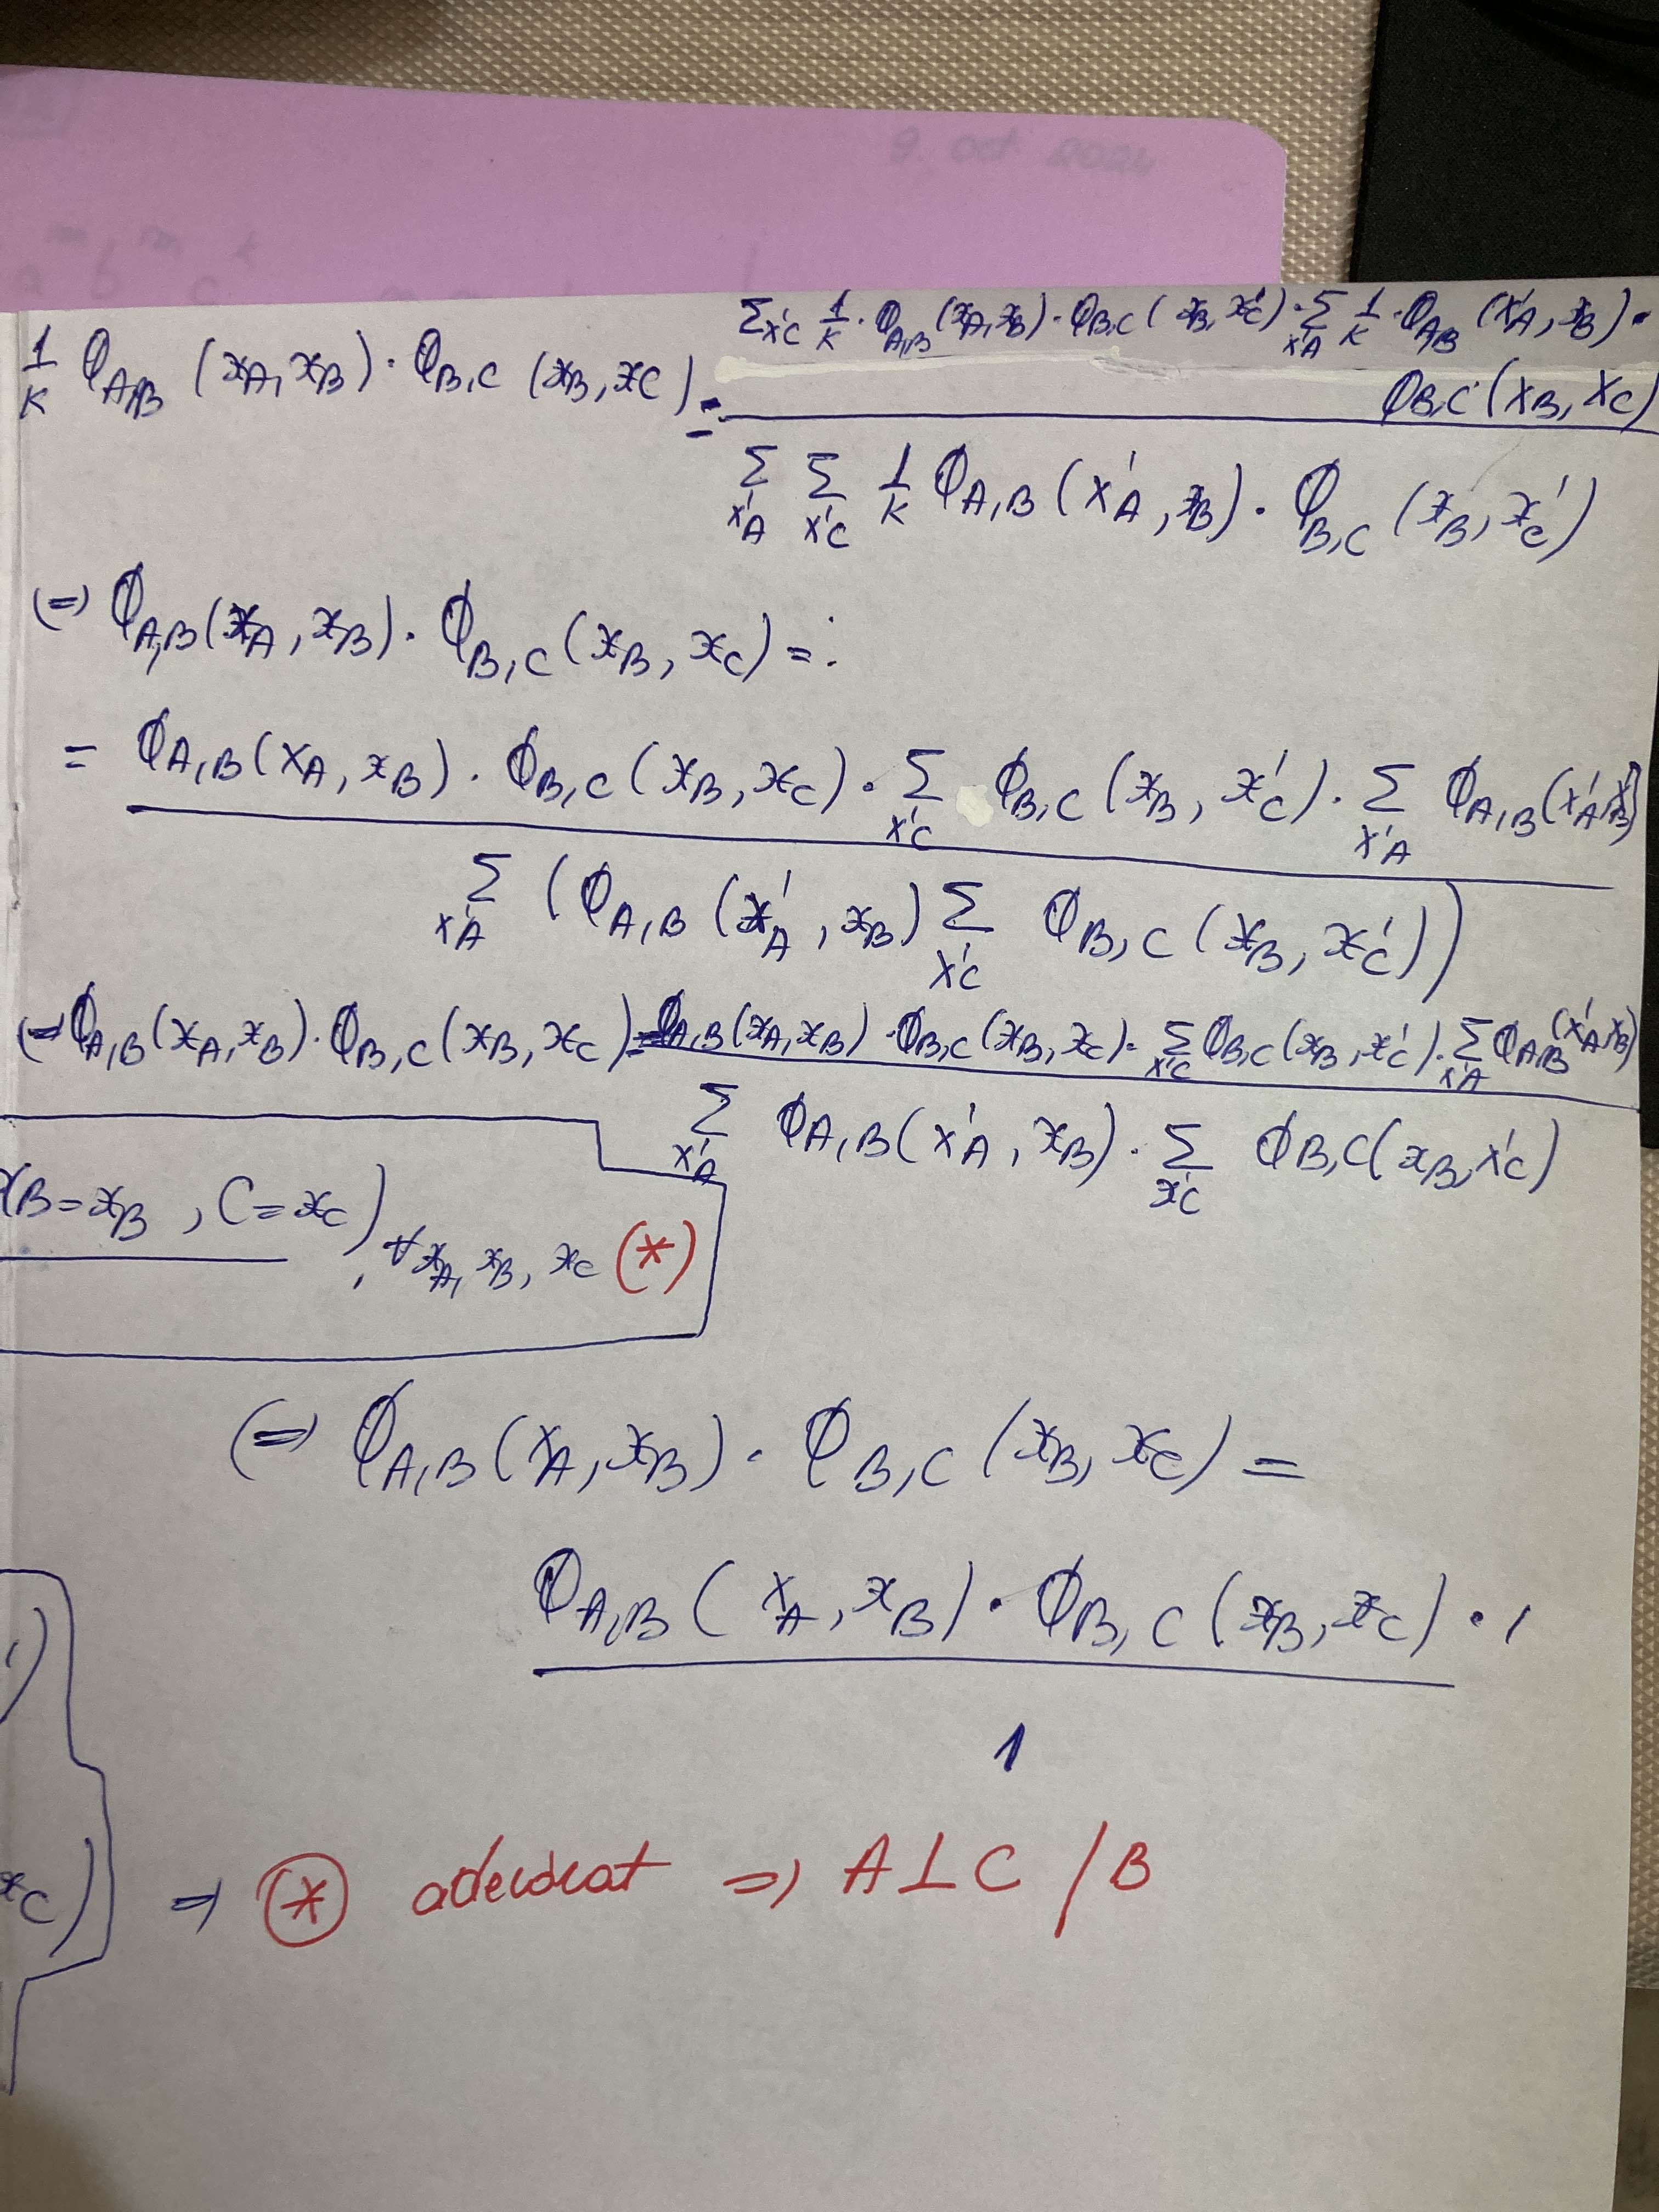

Exercitiul 2:

In [ ]:
!pip install pgmpy

In [2]:
import numpy as np
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation
import matplotlib.pyplot as plt
import networkx as nx
import re

In [11]:

model = MarkovNetwork()

# definim nodurile pentru fiecare statie meteo (de exemplu, S1, S2, S3)
stations = ['S1', 'S2', 'S3']
for station in stations:
    model.add_node(station)

# definim muchiile (relatiile) intre statiile adiacente
# de exemplu, S1 este conectată cu S2 si S3 (adica sunt vecine)
edges = [('S1', 'S2'), ('S2', 'S3')]
for edge in edges:
    model.add_edge(*edge)

# definim matricea potentiala pentru fiecare pereche de statii vecine
# matricea este aceeasi pentru toate relatiile dintre statii
potential_matrix = [
    [0.7, 0.2, 0.1],
    [0.2, 0.6, 0.2],
    [0.1, 0.2, 0.7]
]

# adaugam factorii de potential (de tip DiscreteFactor) pentru fiecare pereche de statii
states = ['Soare', 'Ploaie', 'Nori']
for edge in edges:
    factor = DiscreteFactor(variables=[edge[0], edge[1]], cardinality=[3, 3], values=potential_matrix)
    model.add_factors(factor)

# definim probabilitatile initiale pentru fiecare statie meteo
initial_probabilities = {
    'S1': [0.5, 0.3, 0.2],  # Probabilitatile pentru Soare, Ploaie, Nori la S1
    'S2': [0.6, 0.2, 0.2],  # Probabilitatile pentru S2
    'S3': [0.4, 0.4, 0.2]   # Probabilitatile pentru S3
}

# adaugam probabilitatile initiale ca factori
for station, prob in initial_probabilities.items():
    factor = DiscreteFactor(variables=[station], cardinality=[3], values=prob)
    model.add_factors(factor)

# verificam daca modelul este corect definit
model.check_model()

# facem inferenta folosind Belief Propagation și MAP
bp = BeliefPropagation(model)

# interogam MAP (Maximum A Posteriori) pentru a prezice starea vremii la fiecare stație
map_result = bp.map_query(variables=stations)

# fisam rezultatele MAP
print("Rezultatul MAP (cele mai probabile stări la fiecare stație meteo):")
for station, state in map_result.items():
    state_name = states[state]  # Convertim indexul starii în nume
    print(f"{station}: {state_name}")

Rezultatul MAP (cele mai probabile stări la fiecare stație meteo):
S1: Soare
S2: Soare
S3: Soare


Exercitiul 3

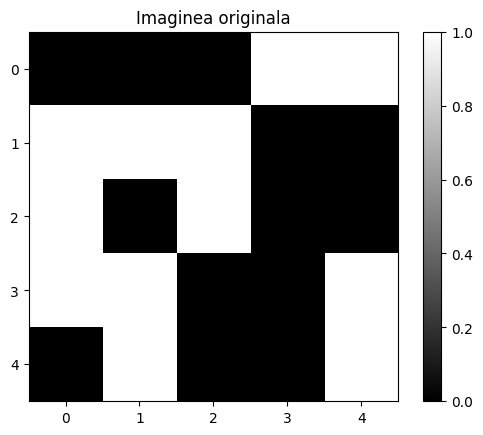

[[0 0 0 1 1]
 [1 1 1 0 0]
 [1 0 1 0 0]
 [1 1 0 0 1]
 [0 1 0 0 1]]


In [12]:
img_size = (5, 5)

original_image = np.random.choice([0, 1], size=img_size)

plt.imshow(original_image, cmap='gray')
plt.title("Imaginea originala")
plt.colorbar()
plt.show()
print(original_image)

b)

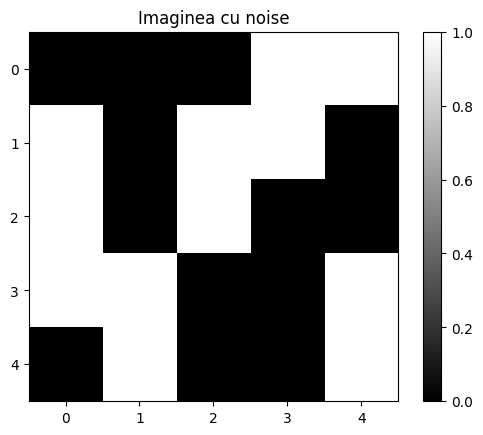

[[0 0 0 1 1]
 [1 0 1 1 0]
 [1 0 1 0 0]
 [1 1 0 0 1]
 [0 1 0 0 1]]


In [13]:
procent_noise = 0.1
nr_pixels_change = int(procent_noise * img_size[0] * img_size[1])

noisy_image = original_image.copy()

noise_indices = np.random.choice(img_size[0] * img_size[1], nr_pixels_change, replace=False)

for idx in noise_indices:
    row, col = divmod(idx, img_size[1])
    noisy_image[row, col] = 1 - noisy_image[row, col]

plt.imshow(noisy_image, cmap='gray')
plt.title("Imaginea cu noise")
plt.colorbar()
plt.show()

print(noisy_image)

c)

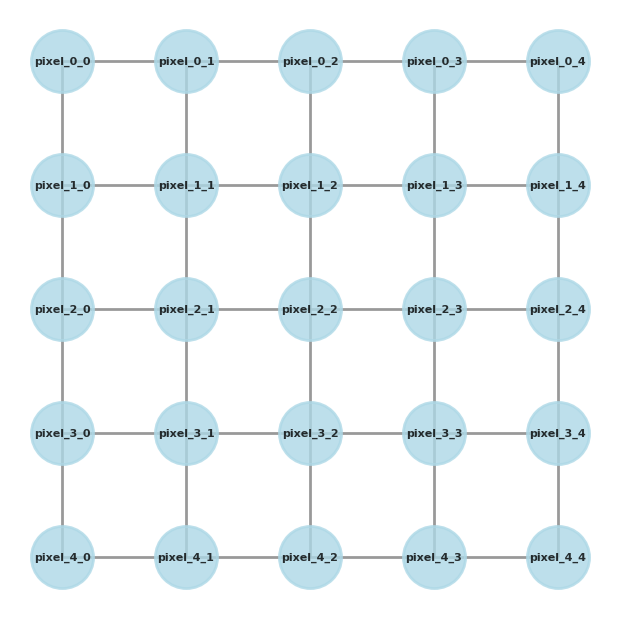

In [14]:
# Cream Reteaua Markov
model = MarkovNetwork()

# Adaugam noduri pentru fiecare pixel
for i in range(img_size[0]):
    for j in range(img_size[1]):
        model.add_node(f'pixel_{i}_{j}')

# Adaugam conexiuni intre pixeli vecini (N, S, E, W)
for i in range(img_size[0]):
    for j in range(img_size[1]):
        if i > 0: # Nord
            model.add_edge(f'pixel_{i}_{j}', f'pixel_{i-1}_{j}')
        if i < img_size[0] - 1: # Sud
            model.add_edge(f'pixel_{i}_{j}', f'pixel_{i+1}_{j}')
        if j > 0: # Vest
            model.add_edge(f'pixel_{i}_{j}', f'pixel_{i}_{j-1}')
        if j < img_size[1] - 1: # Est
            model.add_edge(f'pixel_{i}_{j}', f'pixel_{i}_{j+1}')

# Vizualizam Reteaua
G = nx.Graph()
G.add_nodes_from(model.nodes())
G.add_edges_from(model.edges())

pos_nx = {f'pixel_{i}_{j}': (j, -i) for i in range(img_size[0]) for j in range(img_size[1])}
plt.figure(figsize=(6, 6))
nx.draw(G, pos=pos_nx, with_labels=True, node_size=2000, node_color='lightblue', font_size=8, font_weight='bold',
        edge_color='gray', width=2, alpha=0.8, linewidths=2)

d)

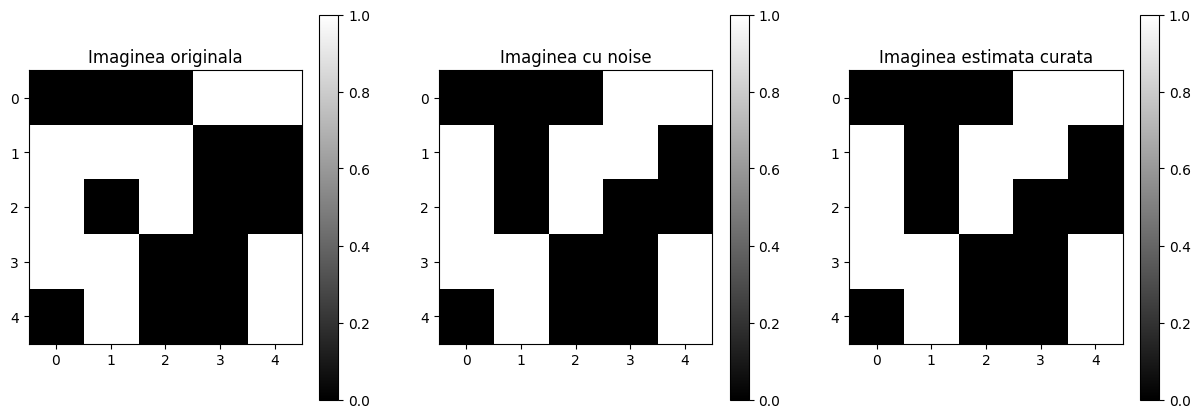

In [15]:
lambda_val = 3.0

for i in range(img_size[0]):
    for j in range(img_size[1]):
        # Factor pentru penalizarea discrepanței între pixelul observat și cel estimat
        factor = DiscreteFactor(
            variables=[f'pixel_{i}_{j}'],
            cardinality=[2],
            values = [np.exp(-lambda_val * (val - noisy_image[i, j])**2) for val in [0, 1]]
        )
        model.add_factors(factor)

# Penalizarea discrepantelor intre vecini
for (pixel1, pixel2) in model.edges():
    factor = DiscreteFactor(
        variables=[pixel1, pixel2],
        cardinality=[2, 2],
        values=[np.exp(-(xi - xj)**2) for xi in [0, 1] for xj in [0, 1]]
    )
    model.add_factors(factor)

bp = BeliefPropagation(model)
map_query = bp.map_query(variables=[f'pixel_{i}_{j}' for i in range(img_size[0]) for j in range(img_size[1])])

estimated_image = np.zeros((img_size[0], img_size[1]))
for i in range(img_size[0]):
    for j in range(img_size[1]):
        estimated_image[i, j] = map_query[f'pixel_{i}_{j}']

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray', vmin=0, vmax=1)
plt.title("Imaginea originala")
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray', vmin=0, vmax=1)
plt.title("Imaginea cu noise")
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(estimated_image, cmap='gray', vmin=0, vmax=1)
plt.title("Imaginea estimata curata")
plt.colorbar()

plt.show()